In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/yagyansh/ml-models-understanding/datasets/advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
cols_to_use = ['TV', 'Radio', 'Newspaper']
df = df[cols_to_use]

df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
df['Sales'] = df['TV'] + df['Radio'] + df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0


In [6]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree = 2, 
                                            interaction_only = False, 
                                            include_bias = False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
poly_features.shape

(200, 9)

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [14]:
230.1*230.1

52946.009999999995

In [15]:
37.8**2

1428.8399999999997

In [16]:
poly_features = polynomial_converter.fit_transform(X) 

In [17]:
poly_features.shape

(200, 9)

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(160, 9)

In [21]:
X_test.shape 

(40, 9)

In [22]:
y_train.shape

(160,)

In [23]:
y_test.shape

(40,)

In [24]:
from sklearn.linear_model import LinearRegression 

In [25]:
model = LinearRegression() 

In [26]:
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred) 
R2 = r2_score(y_test, y_pred) 

In [28]:
MAE

4.3085535139653075e-12

In [29]:
MSE

2.3359195029504776e-23

In [30]:
R2

1.0

In [31]:
model.coef_

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  7.39296116e-17,
        1.98013849e-17, -1.99325403e-16,  4.27585441e-16, -4.76343908e-16,
        4.30017888e-16])

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [33]:
# create the different order of polynomial features
# split polynomial features into training and testing sets
# fit on the training set
# store the RMSE for each order of polynomial features 

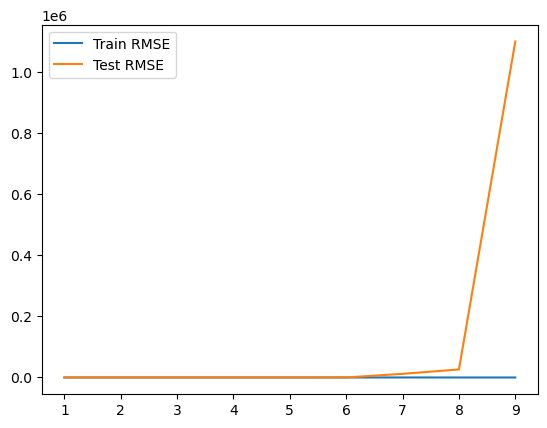

In [34]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree = d, 
                                        interaction_only = False, 
                                        include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')
plt.legend()

In [35]:
train_rmse_errors

[4.1590323735224076e-14,
 4.654912169752902e-12,
 6.413888274051973e-10,
 5.360144101655445e-07,
 0.0001833613637924005,
 0.4249679680306312,
 30.31475701627636,
 2.452982446759285,
 11.033793307156825]

In [36]:
test_rmse_errors

[4.101807575515183e-14,
 4.833135113930168e-12,
 6.841699294099514e-10,
 6.050275600943997e-07,
 0.00021084505557062138,
 77.33031170124966,
 11895.3527698654,
 26252.49855680509,
 1099818.7605055037]

In [37]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [38]:
final_model = LinearRegression() 

In [39]:
full_converted_X = final_poly_converter.fit_transform(X) 
final_model.fit(full_converted_X, y)

LinearRegression()

In [ ]:
from joblib import dump, load 
dump(final_model, 'final_model.joblib')
final_model = load('final_model.joblib')
final_model.predict(full_converted_X)

2.651177055668086e-09

In [41]:
final_model.coef_

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -7.25632681e-14,
        4.04422736e-15,  9.09529463e-15,  4.58843662e-14, -7.52817710e-14,
        1.11237991e-14, -9.83939362e-18,  1.73345198e-16, -4.28453289e-17,
       -4.46292147e-17, -4.68373963e-17, -3.87315832e-17,  3.37935565e-17,
        1.39613708e-17, -1.65137290e-16, -5.97925068e-17])

In [42]:
final_model.intercept_

2.651177055668086e-09